In [1]:
import os
from collections.abc import Callable

import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
from matplotlib.figure import Figure

DATA_SRC = os.path.join("..", "Data")

path = os.path.join(DATA_SRC, "CSV", "train.csv")

data_df = pd.read_csv(path)


# Estudios Individuales


In [2]:
compare_functions: list[Callable[[dict[str, pd.DataFrame], Axes], None]] = []


## Carlos


### Estudio X


## Jose Antonio


### Estudio Y


## Santiago


### Estudio Z

In [3]:
def bmi_bpm(dfs: dict[str, pd.DataFrame], ax: Axes):
    """Genera graficas comparativas para todos los Dataframes
    en la misma grafica diferenciados por colores
    comparando (x,y) los campos Physical-BMI y Phisical-HeartRate
    """
    colormap = plt.get_cmap("tab20", len(dfs))

    for i, (name, df) in enumerate(dfs.items()):
        ax.scatter(
            df["Physical-BMI"],
            df["Physical-HeartRate"],
            label=name,
            color=colormap(i),
        )

    plt.xlabel("Physical-BMI")
    plt.ylabel("Physical-HeartRate")
    ax.legend()


compare_functions.append(bmi_bpm)


def bmi_fat(dfs: dict[str, pd.DataFrame], ax: Axes):
    """Genera graficas comparativas para todos los Dataframes
    en la misma grafica diferenciados por colores
    comparando (x,y) los campos Physical-BMI y BIA-BIA_Fat
    """
    colormap = plt.get_cmap("tab20", len(dfs))

    def filter(df):
        return df[df["BIA-BIA_Fat"] > 0]

    def compose_values(df):
        total = df["BIA-BIA_Fat"] + df["BIA-BIA_FFM"]
        return (df["BIA-BIA_Fat"] / total) * 100

    for i, (name, df) in enumerate(dfs.items()):
        data = filter(df)
        ax.scatter(
            data["Physical-BMI"],
            compose_values(data),
            label=name,
            color=colormap(i),
        )
    plt.xlabel("Physical-BMI")
    plt.ylabel("BIA-BIA_Fat")
    ax.legend()


compare_functions.append(bmi_fat)


def bpm_fat(dfs: dict[str, pd.DataFrame], ax: Axes):
    """Genera graficas comparativas para todos los Dataframes
    en la misma grafica diferenciados por colores
    comparando (x,y) los campos Physical-HeartRate y BIA-BIA_Fat
    """
    colormap = plt.get_cmap("tab20", len(dfs))

    def filter(df):
        return df[df["BIA-BIA_Fat"] > 0]

    def compose_values(df):
        total = df["BIA-BIA_Fat"] + df["BIA-BIA_FFM"]
        return (df["BIA-BIA_Fat"] / total) * 100

    for i, (name, df) in enumerate(dfs.items()):
        data = filter(df=df)
        ax.scatter(
            data["Physical-HeartRate"],
            compose_values(data),
            label=name,
            color=colormap(i),
        )

    plt.xlabel("Physical-HeartRate")
    plt.ylabel("BIA-BIA_Fat")
    ax.legend()


compare_functions.append(bpm_fat)


## Ejecucion de Comparaciones


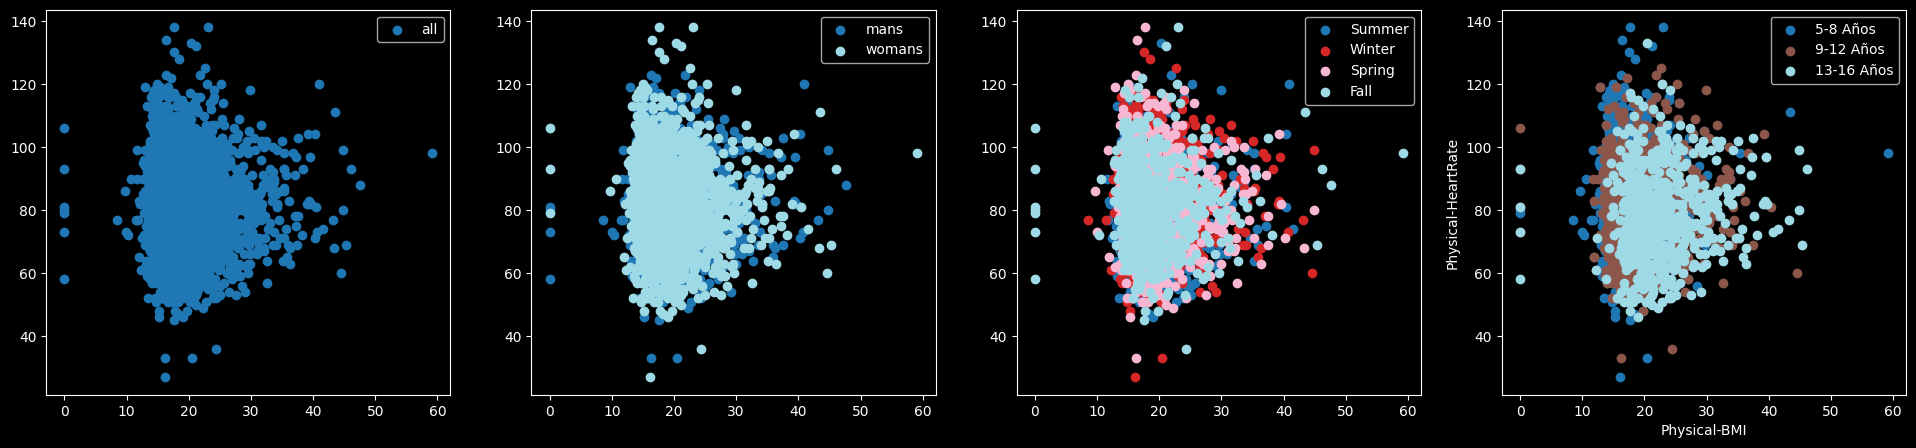

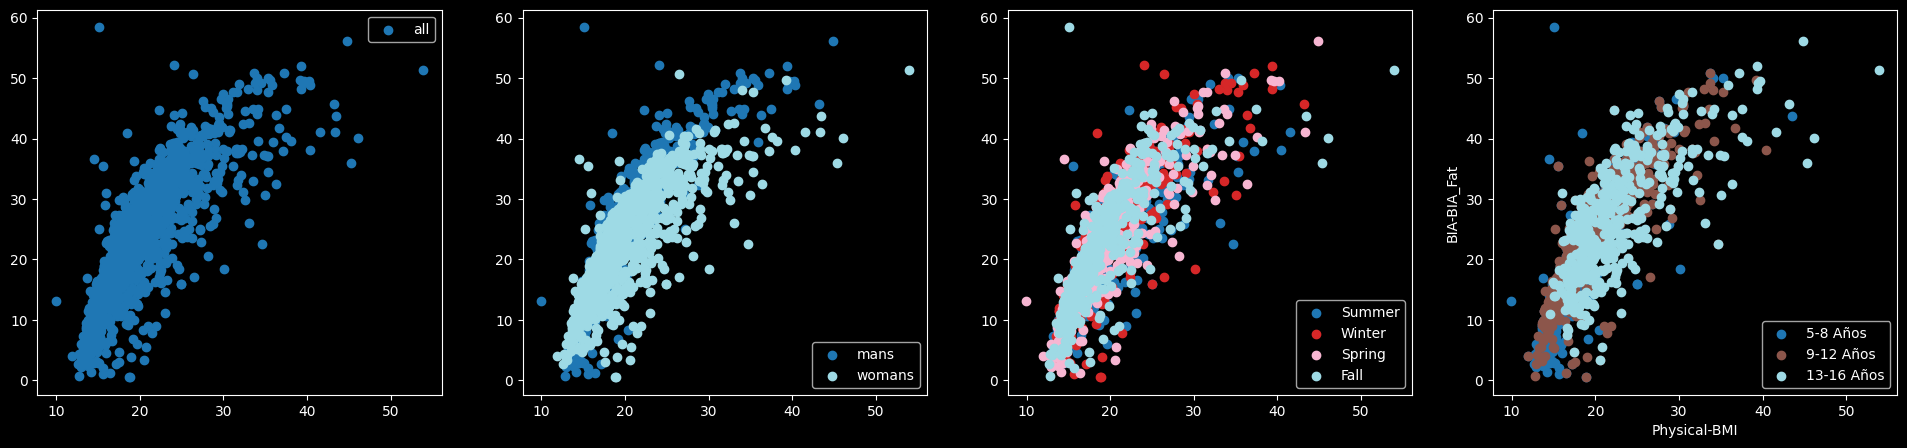

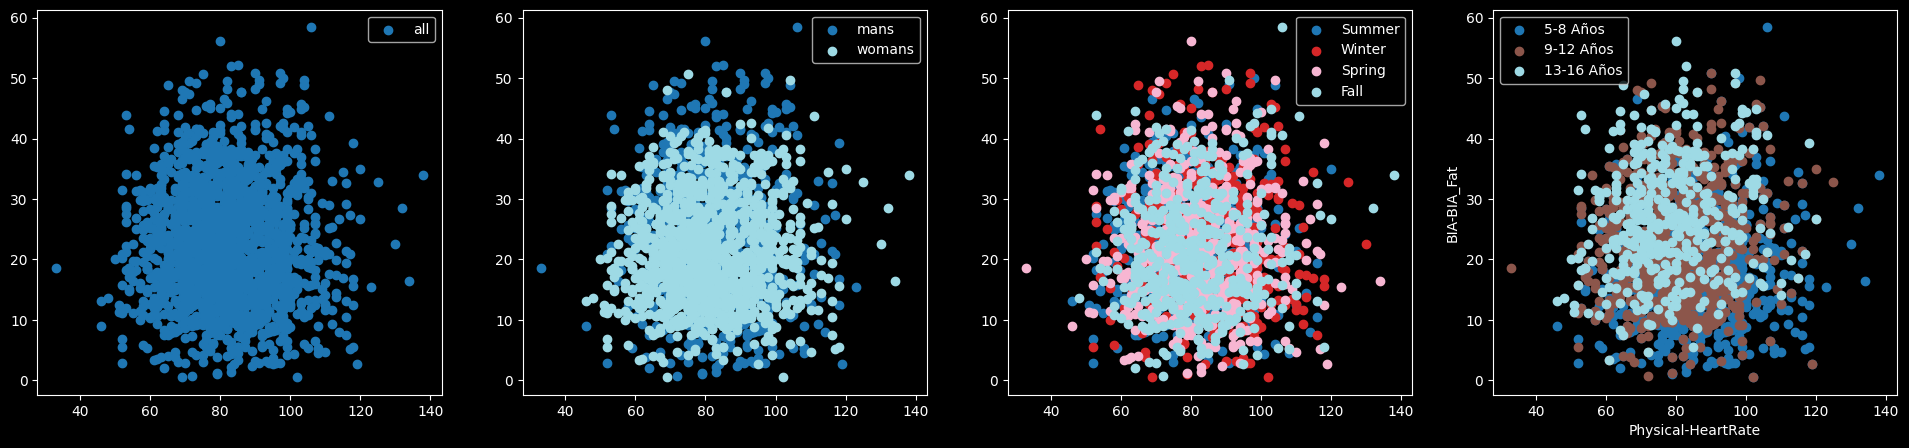

In [4]:
comparative_data: list[dict[str, pd.DataFrame]] = []

# EJEMPLOS 1
data_dict = {"all": data_df}
comparative_data.append(data_dict)

# EJEMPLOS 2
data_dict = {}
data_dict["mans"] = data_df[data_df["Basic_Demos-Sex"] == 1]
data_dict["womans"] = data_df[data_df["Basic_Demos-Sex"] == 0]
comparative_data.append(data_dict)

# EJEMPLOS 3
data_dict = {}
data_dict["Summer"] = data_df[data_df["Physical-Season"] == "Summer"]
data_dict["Winter"] = data_df[data_df["Physical-Season"] == "Winter"]
data_dict["Spring"] = data_df[data_df["Physical-Season"] == "Spring"]
data_dict["Fall"] = data_df[data_df["Physical-Season"] == "Fall"]
comparative_data.append(data_dict)

# EJEMPLOS 4
data_dict = {}
data_dict["5-8 Años"] = data_df[data_df["Basic_Demos-Age"].between(5, 9)]
data_dict["9-12 Años"] = data_df[data_df["Basic_Demos-Age"].between(9, 13)]
data_dict["13-16 Años"] = data_df[data_df["Basic_Demos-Age"].between(13, 17)]

comparative_data.append(data_dict)

for compare_function in compare_functions:
    fig, ax = plt.subplots(1, len(comparative_data), figsize=(len(comparative_data) * 6, 5))
    for i, data_dict in enumerate(comparative_data):
        compare_function(data_dict, ax[i])
